# movie genre classification 

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# train data 
df_train = pd.read_csv('C:/Users/abhay/machine learning/codsoft/Genre Classification Dataset/train_data.txt',header=0, sep=":::")
df_train.columns=['ID','TITLE','GENRE','DESCRIPTION']

In [3]:
df_train.head()

,ID,TITLE,GENRE,DESCRIPTION
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [4]:
# test data 
df_test = pd.read_csv('C:/Users/abhay/machine learning/codsoft/Genre Classification Dataset/test_data.txt',header=0, sep=":::")
df_test.columns=['ID','TITLE','DESCRIPTION']

In [5]:
df_test.head()

,ID,TITLE,DESCRIPTION
0,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
1,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
2,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
3,5,Er nu zhai (1955),Before he was known internationally as a mart...
4,6,Riddle Room (2016),Emily Burns is being held captive in a room w...


In [6]:
df_train.shape

(54213, 4)

In [7]:
df_test.shape

(54199, 3)

In [8]:
# checking null value 
df_train.isnull().sum()

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [9]:
df_test.isnull().sum()

ID             0
TITLE          0
DESCRIPTION    0
dtype: int64

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54213 entries, 0 to 54212
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54213 non-null  int64 
 1   TITLE        54213 non-null  object
 2   GENRE        54213 non-null  object
 3   DESCRIPTION  54213 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54199 entries, 0 to 54198
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54199 non-null  int64 
 1   TITLE        54199 non-null  object
 2   DESCRIPTION  54199 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [12]:
# description 
df_test.describe()

,ID
count,54199.000000
mean,27101.000000
std,15646.047957
min,2.000000
25%,13551.500000
50%,27101.000000
75%,40650.500000
max,54200.000000


In [13]:
df_train.describe()

,ID
count,54213.000000
mean,27108.000000
std,15650.089409
min,2.000000
25%,13555.000000
50%,27108.000000
75%,40661.000000
max,54214.000000


## visulazation of data 

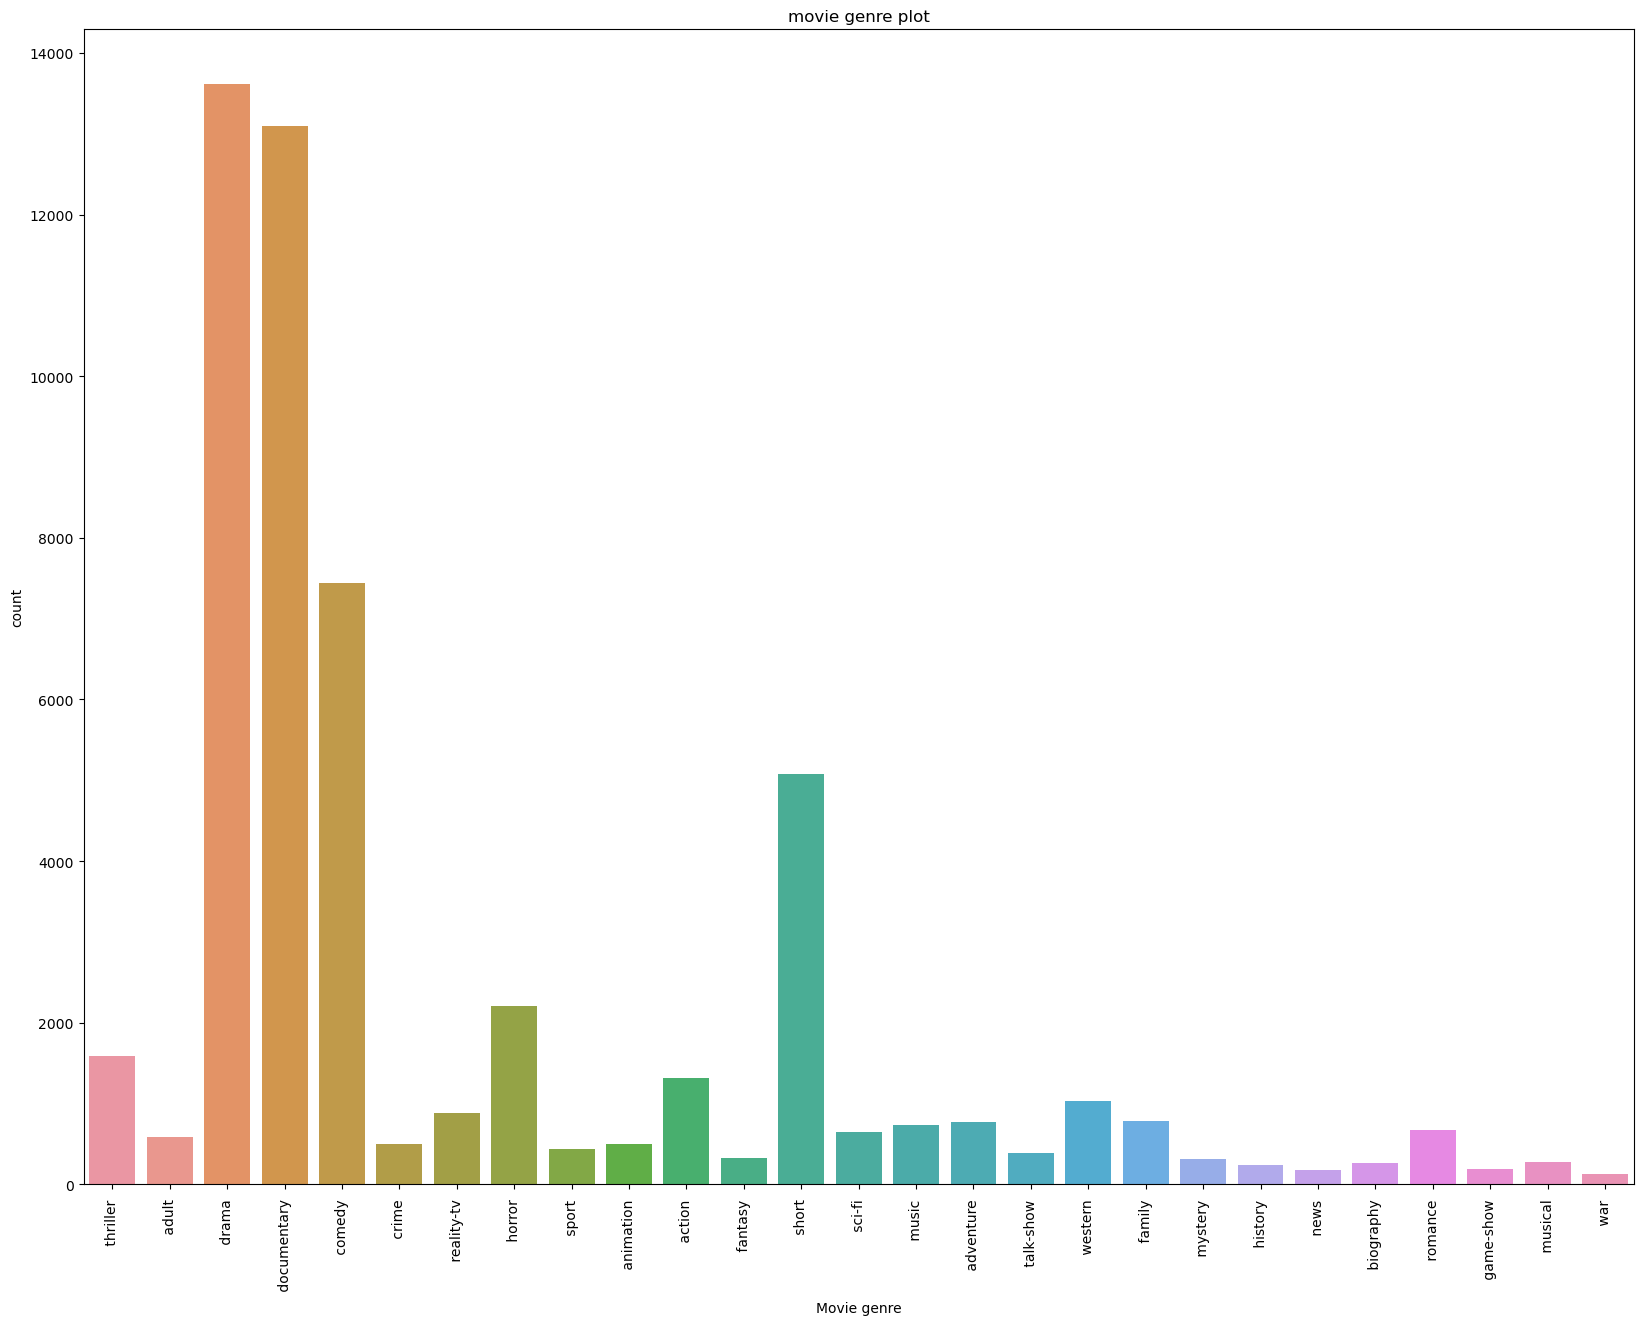

In [14]:
plt.figure(figsize=(20,15),edgecolor='r')
sns.countplot(x='GENRE',data=df_train)
plt.xlabel('Movie genre')
plt.ylabel('count')
plt.title('movie genre plot')
plt.xticks(rotation=90)
plt.show()

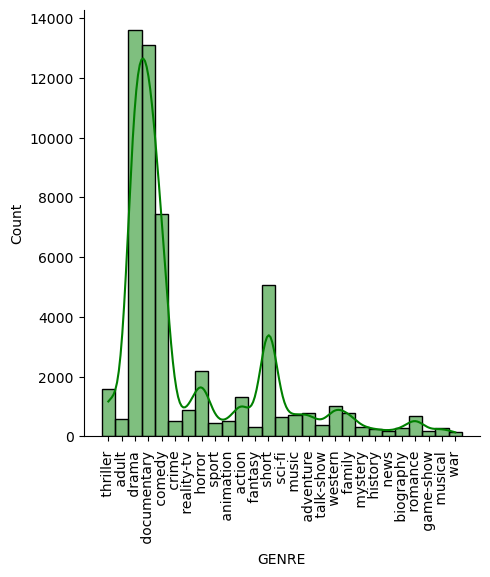

In [15]:
sns.displot(df_train.GENRE,kde=True,color="green")
plt.xticks(rotation=90);

In [16]:
# combining train and test data 
df_combined = pd.concat([df_train,df_test],axis=0)
df_combined.head()

,ID,TITLE,GENRE,DESCRIPTION
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [17]:
df_combined.shape

(108412, 4)

In [18]:
df_combined.size

433648

In [19]:
df_combined.isnull().sum()

ID                 0
TITLE              0
GENRE          54199
DESCRIPTION        0
dtype: int64

In [20]:
# hyperparameter tunning 
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [21]:
df_combined['GENRE']=encoder.fit_transform(df_combined["GENRE"].values)

In [22]:
df_combined['TITLE']=encoder.fit_transform(df_combined["TITLE"].values)

In [23]:
df_combined.head()

,ID,TITLE,GENRE,DESCRIPTION
0,2,31219,24,A brother and sister with a past incestuous r...
1,3,107506,1,As the bus empties the students for their fie...
2,4,96119,8,To help their unemployed father make ends mee...
3,5,97557,8,The film's title refers not only to the un-re...
4,6,74516,7,Quality Control consists of a series of 16mm ...


In [24]:
# filling NAN value in genre with mean 
df_combined.GENRE = df_combined.GENRE.fillna(df_combined.GENRE.mean())

In [25]:
df_combined.duplicated().values.any()

False

In [26]:
# preprocessing the description
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [27]:
X=vectorizer.fit_transform(df_combined["DESCRIPTION"])

In [28]:
X

<108412x176560 sparse matrix of type '<class 'numpy.float64'>'
	with 7467594 stored elements in Compressed Sparse Row format>

In [29]:
y=df_combined['GENRE']

In [30]:
y

0        24
1         1
2         8
3         8
4         7
         ..
54194    27
54195    27
54196    27
54197    27
54198    27
Name: GENRE, Length: 108412, dtype: int32

In [31]:
# train test split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=36)

In [32]:
X_train,y_train

(<75888x176560 sparse matrix of type '<class 'numpy.float64'>'
 	with 5230921 stored elements in Compressed Sparse Row format>,
 42197     7
 51374    23
 50560    27
 50278     7
 2046     27
          ..
 7329      8
 52136     5
 36825    27
 44701    27
 40640    27
 Name: GENRE, Length: 75888, dtype: int32)

## 1. Naive bayes algorithm

In [33]:
# training data with navie bayes model
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train,y_train)


MultinomialNB()

In [34]:
y_pred=model.predict(X_test)

In [35]:
y_pred

array([27, 27, 27, ..., 27, 27, 27])

In [36]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,r2_score

In [52]:
naive_accuracy=accuracy_score(y_test,y_pred)

In [53]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy",naive_accuracy)
print("r2_score:",r2_score(y_test,y_pred))

[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   436]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   172]
 [    0     0     0     0     0     0     0     0     2     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   218]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   146]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0    68]
 [    0     0     0     0     0    14     0     0     8     0     0     0
      0     0     0     0     0     0     0     0  

## 2.Logistic regression

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
logistic_regression=LogisticRegression()

In [56]:
logistic_regression.fit(X_train,y_train)

LogisticRegression()

In [57]:
y_pred2=logistic_regression.predict(X_test)

In [58]:
y_pred2

array([26,  7, 27, ..., 27,  7, 27])

In [59]:
LR_accuracy=accuracy_score(y_test,y_pred2)

In [60]:
print("logistic regression:")
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))
print("accuracy:",LR_accuracy)
print("r2_score:",r2_score(y_test,y_pred2))

logistic regression:
[[    1     0     0     0     0     0     0     0     6     0     0     0
      0     1     0     0     0     0     0     0     0     0     1     0
      3     0     0   424]
 [    0     3     1     0     0     5     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     1     0     0
      0     0     0   162]
 [    0     0     4     0     0     1     0     3     0     0     0     0
      0     1     0     0     0     0     2     0     0     0     0     0
      0     0     0   209]
 [    0     0     0     0     0     5     0     1     1     0     0     0
      0     1     0     0     0     0     0     0     0     0     0     0
      0     0     0   138]
 [    0     0     0     0     0     0     0    11     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0    57]
 [    0     0     0     0     0   184     0     7    42     0     0     0
      0     1     0     0     

In [64]:
algorithm=['LogisticRegression', 'MultinomialNB']
accuracy= [LR_accuracy, naive_accuracy]

FinalResult=pd.DataFrame({'Algorithm':algorithm, 'Accuracy':accuracy})

FinalResult

,Algorithm,Accuracy
0,LogisticRegression,0.487886
1,MultinomialNB,0.499078
